In [ ]:
IMAGE_PATH = r"C:\Users\nam\Downloads\target0001.jpeg"

## Shear 각도별 비교

✅ 이미지 로드 성공: (2048, 2048)

--- Shear(기울기) 1도 ~ 20도 생성 시작 ---
[1°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_1deg.jpg
[2°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_2deg.jpg
[3°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_3deg.jpg
[4°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_4deg.jpg
[5°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_5deg.jpg
[6°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_6deg.jpg
[7°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_7deg.jpg
[8°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_8deg.jpg
[9°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_9deg.jpg
[10°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_10deg.jpg
[11°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_11deg.jpg
[12°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_12deg.jpg
[13°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_13deg.jpg
[14°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_14deg.jpg
[15°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_15deg.jpg
[16°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_16deg.jpg
[17°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_17deg.jpg
[18°]

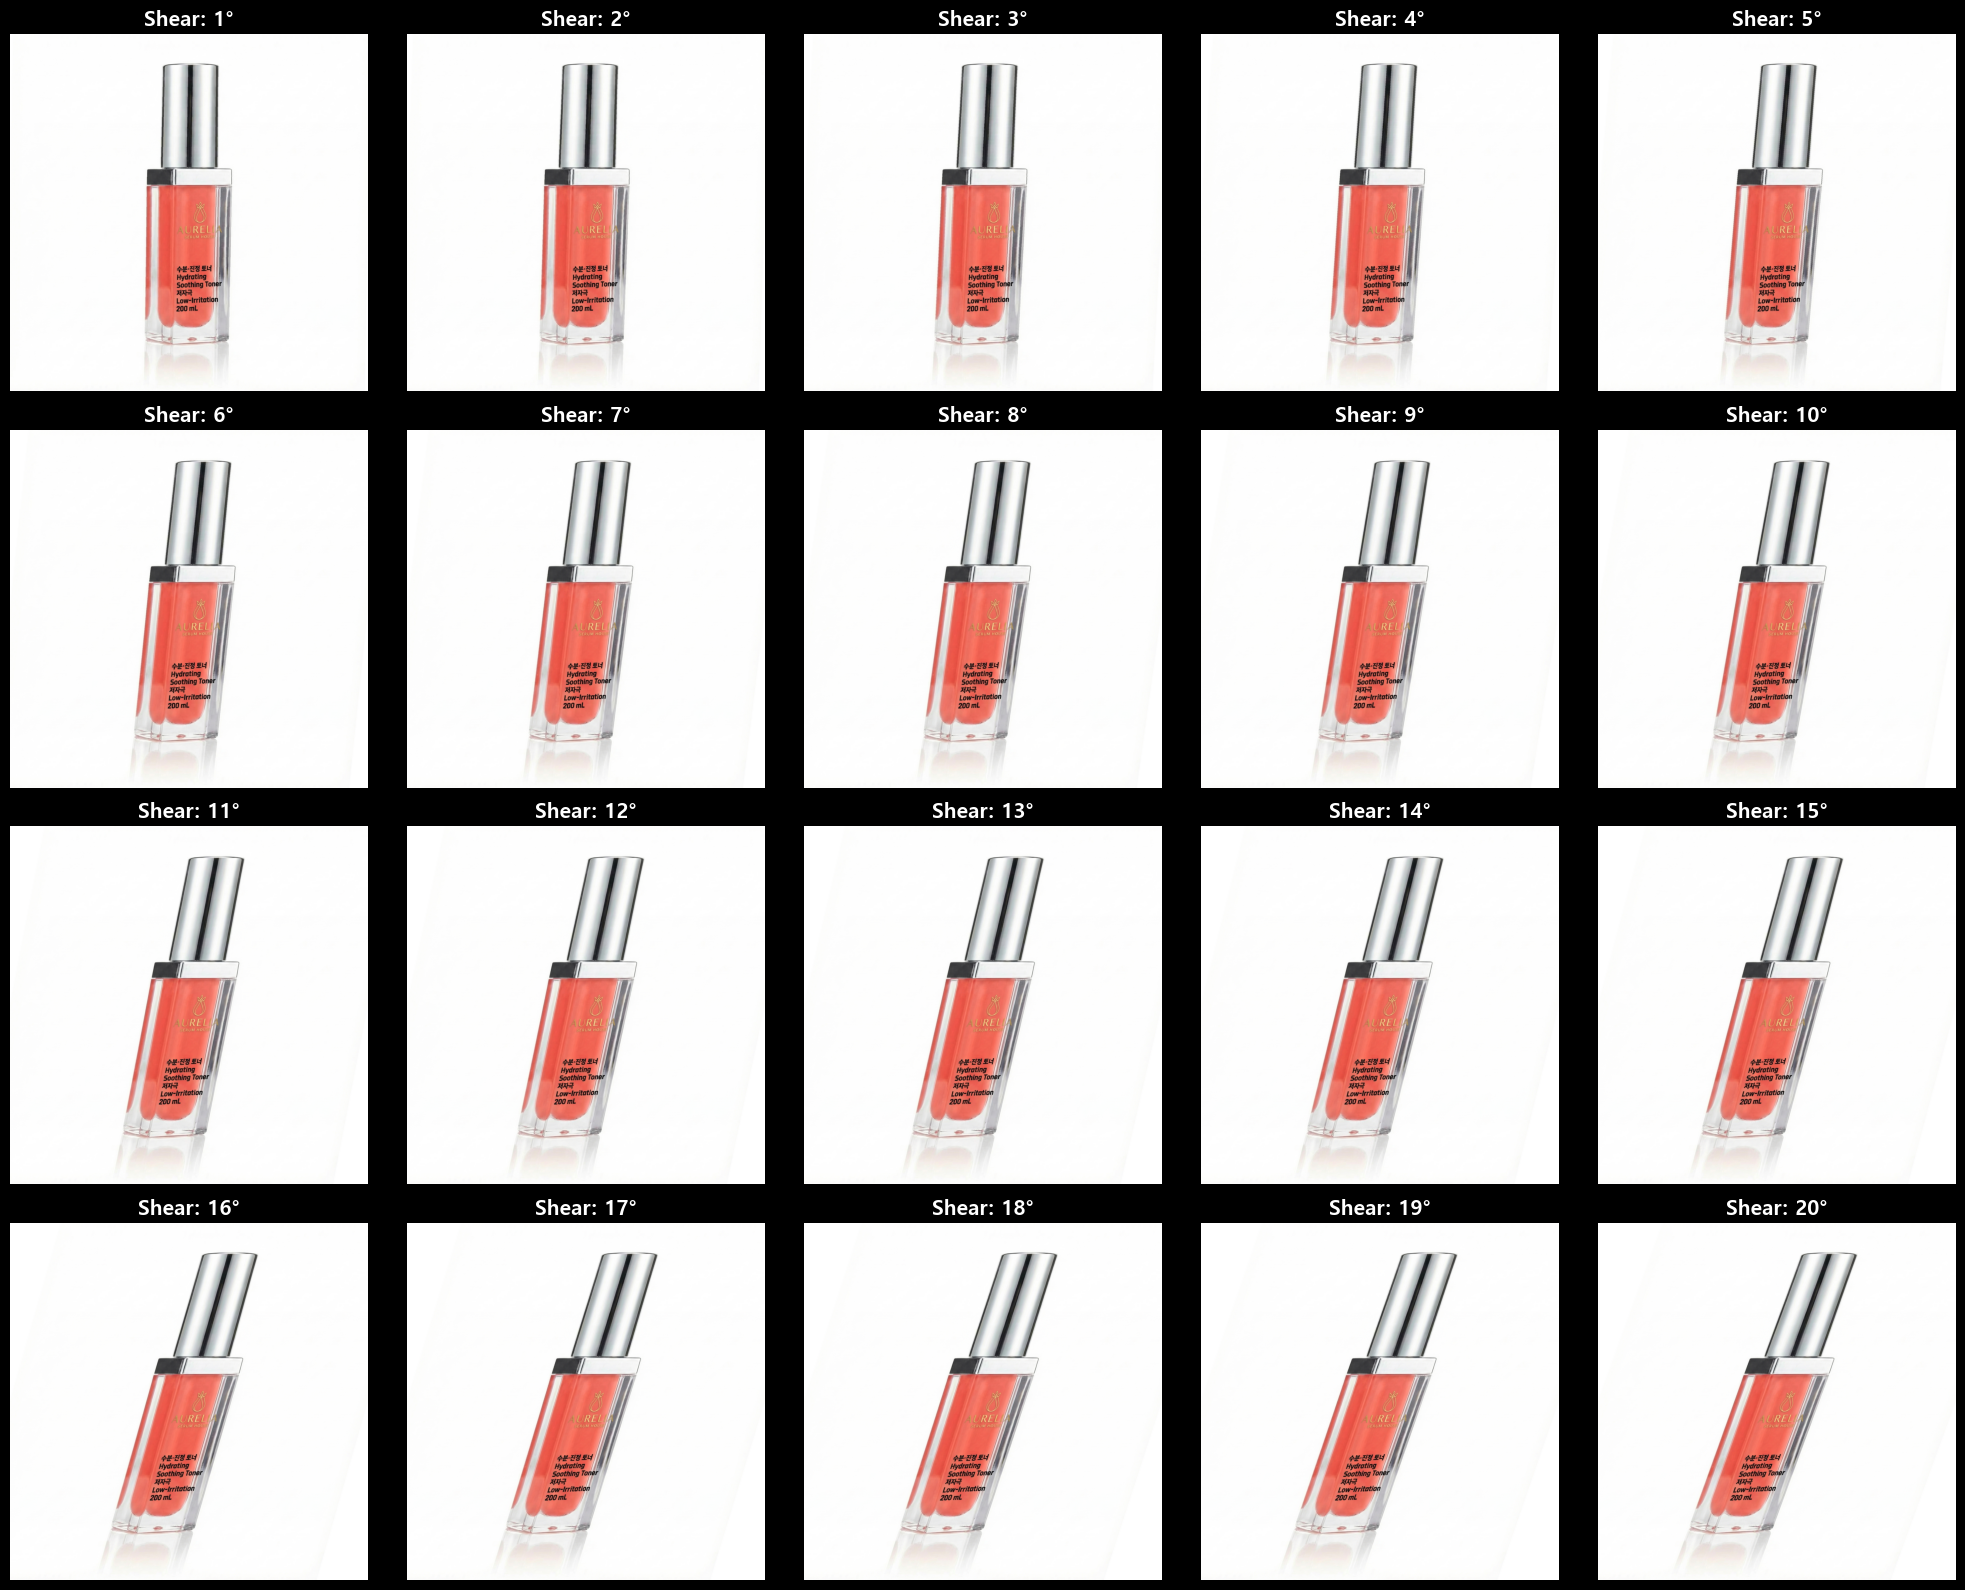

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import v2
import platform

# ========================================================
# [설정] 테스트할 이미지 경로를 입력하세요.
# ========================================================
IMAGE_PATH = r"C:\Users\nam\Desktop\Augmentation\TEST_Ref_1bcc43f9_Ref_4a997140_Giants-Bold_front_0001.png"
OUTPUT_DIR = r"C:\Users\nam\Downloads"

# -----------------------------------------------------------
# [시각화 설정] 한글 폰트 및 그래프 사이즈
# -----------------------------------------------------------
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def run_shear_experiment():
    # 1. 이미지 로드
    if not os.path.exists(IMAGE_PATH):
        print(f"❌ 오류: 파일을 찾을 수 없습니다: {IMAGE_PATH}")
        return

    try:
        original_img = Image.open(IMAGE_PATH).convert("RGB")
        print(f"✅ 이미지 로드 성공: {original_img.size}")
    except Exception as e:
        print(f"❌ 이미지 열기 실패: {e}")
        return

    # 2. 저장 폴더 생성
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    # 3. 그래프 설정 (4행 5열 = 20개)
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    axes = axes.flatten()

    print("\n--- Shear(기울기) 1도 ~ 20도 생성 시작 ---")

    for i in range(1, 21): # 1부터 20까지 반복
        angle = i

        # -------------------------------------------------------
        # [핵심] Shear 적용
        # shear=(min, max)에 같은 값을 넣으면 고정된 각도로 적용됩니다.
        # fill=255: 기울어지면서 생긴 빈 공간을 흰색(255)으로 채움 (문서 배경용)
        # -------------------------------------------------------
        transform = v2.RandomAffine(
            degrees=0,
            shear=(angle, angle),
            fill=255  # 검은색 배경을 원하시면 0으로 바꾸세요
        )

        # 변환 적용
        aug_img = transform(original_img)

        # 파일로 저장
        save_name = f"shear_x_{angle}deg.jpg"
        save_path = os.path.join(OUTPUT_DIR, save_name)
        aug_img.save(save_path)

        # 시각화 (그래프 그리기)
        axes[i-1].imshow(aug_img)
        axes[i-1].set_title(f"Shear: {angle}°", fontsize=15, fontweight='bold')
        axes[i-1].axis('off')

        print(f"[{angle}°] 저장 완료 -> {save_path}")

    print("\n✅ 모든 작업 완료! 그래프를 출력합니다.")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_shear_experiment()

## 다양한 Augmentation 방법들

--- 작업 시작: target0001 ---
[OK] Saved: target0001@Original.jpg
[OK] Saved: target0001@Shear_Weak.jpg
[OK] Saved: target0001@ColorJitter.jpg
[OK] Saved: target0001@Noise_Weak.jpg
[OK] Saved: target0001@Noise_Hard.jpg
[NG] Saved: target0001@Shear_Strong.jpg
[NG] Saved: target0001@Equalize.jpg
[NG] Saved: target0001@Solarize.jpg
[NG] Saved: target0001@Solarize_Strong.jpg

✅ 생성 완료! 요약표 기반 미리보기 창을 띄웁니다...


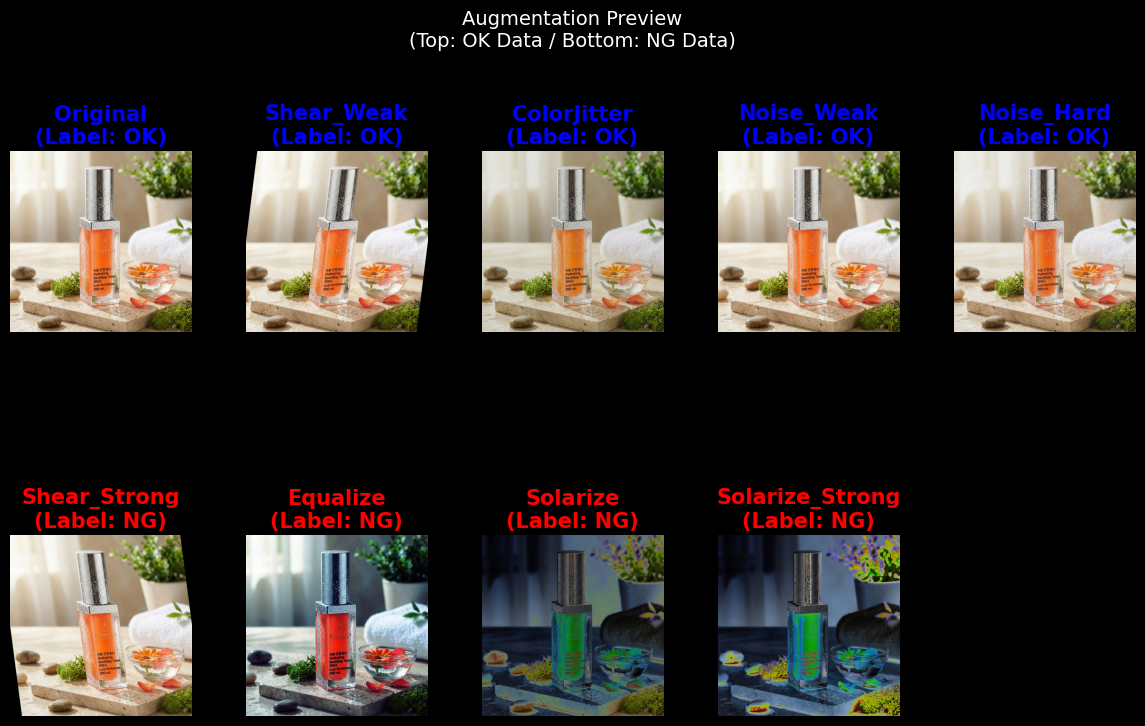

In [4]:
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import v2

# ========================================================
# [설정] 경로 지정
# ========================================================
IMAGE_PATH = r"C:\Users\nam\Downloads\target0001.jpeg"
OUTPUT_DIR = r"C:\Users\nam\Downloads\Augmenation_output"

# -----------------------------------------------------------
# [커스텀] 가우시안 노이즈
# -----------------------------------------------------------
class AddGaussianNoise(nn.Module):
    def __init__(self, mean=0., std=0.03):
        super().__init__()
        self.mean = mean
        self.std = std

    def forward(self, img_tensor):
        noise = torch.randn_like(img_tensor) * self.std + self.mean
        return torch.clamp(img_tensor + noise, 0., 1.)

def get_noise_transform(std):
    return v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        AddGaussianNoise(std=std),
        v2.ToPILImage()
    ])

# ========================================================
# [증강 리스트]
# ========================================================
ok_aug_dict = {
    "Original": v2.Identity(),
    "Shear_Weak": v2.RandomAffine(degrees=0, shear=10),
    "ColorJitter": v2.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    "Noise_Weak": get_noise_transform(std=0.03),
    "Noise_Hard": get_noise_transform(std=0.15),
}

ng_aug_dict = {
    "Shear_Strong": v2.RandomAffine(degrees=0, shear=25),
    "Equalize": v2.RandomEqualize(p=1.0),
    "Solarize": v2.RandomSolarize(threshold=128, p=1.0),
    "Solarize_Strong": v2.RandomSolarize(threshold=60, p=1.0),
}

# -----------------------------------------------------------
# [시각화 함수]
# -----------------------------------------------------------
def show_preview(ok_samples, ng_samples):
    n_ok = len(ok_samples)
    n_ng = len(ng_samples)
    total_cols = max(n_ok, n_ng)

    if total_cols == 0:
        print("시각화할 이미지가 없습니다.")
        return

    # 행: 2개, figsize의 세로(높이)를 조금 더 키워서 여유 공간 확보 (6 -> 8)
    fig, axes = plt.subplots(nrows=2, ncols=total_cols, figsize=(total_cols * 2.5, 8))
    fig.suptitle('Augmentation Preview\n(Top: OK Data / Bottom: NG Data)', fontsize=14, y=0.98)

    # 1. OK 그룹 그리기
    for i in range(total_cols):
        if total_cols == 1: ax = axes[0]
        else: ax = axes[0][i]

        if i < n_ok:
            img, name = ok_samples[i]
            ax.imshow(img)
            ax.set_title(f"{name}\n(Label: OK)", fontsize=15, color='blue', fontweight='bold', pad=5)
        else:
            ax.set_visible(False)
        ax.axis('off')

    # 2. NG 그룹 그리기
    for i in range(total_cols):
        if total_cols == 1: ax = axes[1]
        else: ax = axes[1][i]

        if i < n_ng:
            img, name = ng_samples[i]
            ax.imshow(img)
            ax.set_title(f"{name}\n(Label: NG)", fontsize=15, color='red', fontweight='bold', pad=5)
        else:
            ax.set_visible(False)
        ax.axis('off')

    # 행 간격(hspace) 조정
    plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.05, hspace=0.5, wspace=0.3)

    plt.show()

# -----------------------------------------------------------
# [메인 로직]
# -----------------------------------------------------------
def generate_and_visualize():
    if not os.path.exists(IMAGE_PATH):
        print(f"❌ 이미지를 찾을 수 없습니다: {IMAGE_PATH}")
        return

    try:
        original_img = Image.open(IMAGE_PATH).convert("RGB")
    except Exception as e:
        print(f"❌ 이미지 로드 실패: {e}")
        return

    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    filename = os.path.basename(IMAGE_PATH)
    # 파일명 자체의 _도 @로 변경 (기존 로직 유지)
    base_name = os.path.splitext(filename)[0].replace("_", "@")

    ok_samples_list = []
    ng_samples_list = []

    print(f"--- 작업 시작: {base_name} ---")

    def process_group(aug_dict, label_type, sample_list):
        for name, transform in aug_dict.items():
            try:
                aug_img = transform(original_img)
                if not isinstance(aug_img, Image.Image):
                    aug_img = v2.ToPILImage()(aug_img)

                # ==========================================
                # [수정됨] 파일명 구분자를 '_'에서 '@'로 변경
                # 결과 예시: target0001@Shear_Strong.jpg
                # ==========================================
                save_name = f"{base_name}@{name}.jpg"

                save_path = os.path.join(OUTPUT_DIR, save_name)
                aug_img.save(save_path)
                print(f"[{label_type}] Saved: {save_name}")

                sample_list.append((aug_img.copy(), name))
            except Exception as e:
                print(f"⚠️ Error {name}: {e}")

    process_group(ok_aug_dict, "OK", ok_samples_list)
    process_group(ng_aug_dict, "NG", ng_samples_list)

    print("\n✅ 생성 완료! 요약표 기반 미리보기 창을 띄웁니다...")
    show_preview(ok_samples_list, ng_samples_list)

if __name__ == "__main__":
    generate_and_visualize()